### 문제정의

In [1]:
import pandas as pd
import numpy as np
#위 2가지는 무조건 import하고 시작하기

### 데이터 수집

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

### 데이터 전처리

### 탐색적 분석

In [4]:
iris.keys()
#target: 정답 데이터, target_names: 정답 column명, feature_names: 특성, filename: 파일위치

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris['DESCR']
#DESCR: 데이터에 대한 정보

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
iris['data'].shape
#150개의 행, 4개의 column

(150, 4)

In [7]:
iris['target'].shape
#훈련시킨 데이터(data)와 훈련시킬 데이터(target)의 양(150)은 같아야함

(150,)

### 데이터프레임 변환

In [8]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [9]:
df.head()
#상위 5개의 데이터 확인

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df.head()
#column명 바꾸기

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target'] = iris['target']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
df.isnull().sum()
#빈값 찾기

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [18]:
df.duplicated().sum()
#중복값 확인

1

In [21]:
df.drop_duplicates(inplace=True)
#중복값 제거
# inplace=True 없으면 데이터 확인시에만 안보이고 원본은 그대로

In [22]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
df.corr()
#변수간의 상관계수행렬 : 각 데이터가 서로 얼마나 관련있는지(target 제외)

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


### 데이터 시각화

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

<AxesSubplot:>

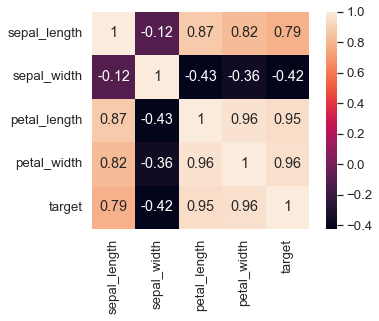

In [26]:
sns.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
# heatmap: 각 변수를 다른 색으로 표현
# annot: 옵션안에 숫자 출력

In [28]:
df['target'].value_counts()
#각 class의 데이터 개수

0    50
1    50
2    49
Name: target, dtype: int64

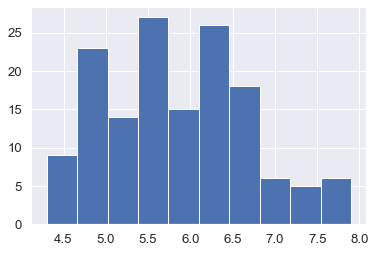

In [29]:
plt.hist(x='sepal_length', data=df)
plt.show()
# hist: 히스토그램

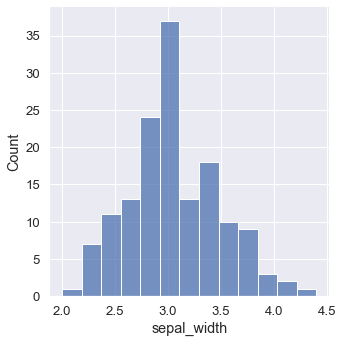

In [31]:
sns.displot(x='sepal_width', kind='hist', data=df)

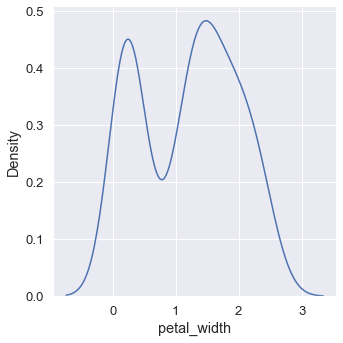

In [32]:
sns.displot(x='petal_width', kind='kde', data=df)

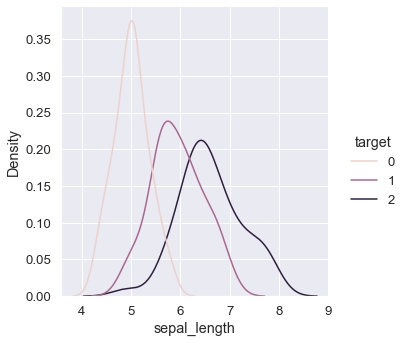

In [33]:
sns.displot(x='sepal_length', hue='target', kind='kde', data=df)
#hue: 나누는 기준

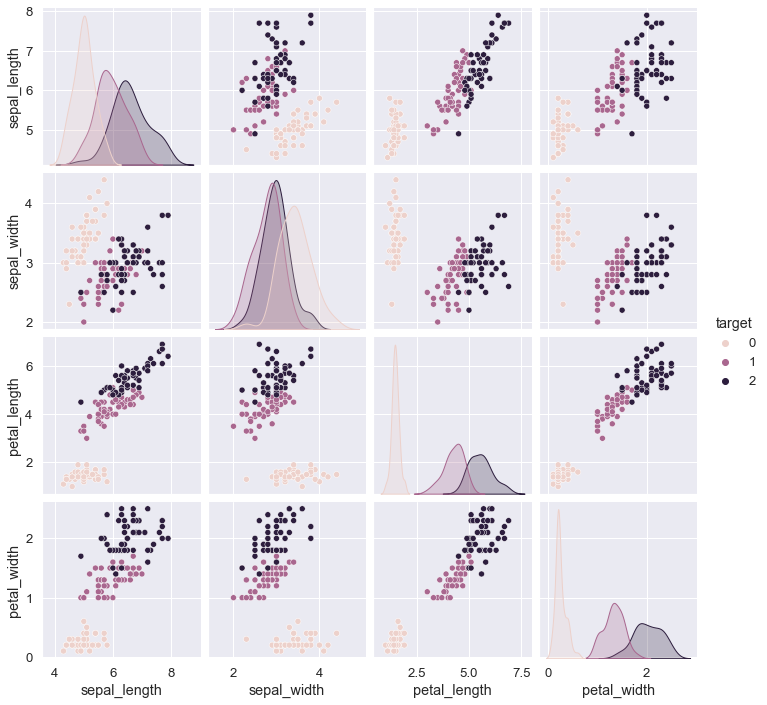

In [34]:
sns.pairplot(df, hue='target', height=2.5, diag_kind='kde')
plt.show()

### 데이터셋 분할

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x = df.loc[:, 'sepal_length':'petal_width']
y = df.loc[:, 'target']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=20)
#shuffle: 무작위 추출
#random_state: 여러번 실행해도 데이터의 배열 고정
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(104, 4) (104,)
(45, 4) (45,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

### 모델정의

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)

### 모델학습

In [42]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

### 모델예측

In [43]:
pred = knn.predict(x_test)

### 모델평가

In [44]:
knn.score(x_test, y_test)

0.9555555555555556

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
acc = accuracy_score(y_test, pred)
print('Accuracy : %4f'%acc)

Accuracy : 0.955556
